In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


In [2]:
income = (data['income'])

In [3]:
n_records = data.shape[0]
n_greater_50k = 0
n_at_most_50k = 0


for i in range(income.size): 
    n_at_most_50k+=float(income[i] == '<=50K')
    n_greater_50k+=float(income[i] == '>50K')

greater_percent = float(n_greater_50k / n_records)*100.0

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208.0
Individuals making at most $50,000: 34014.0
Percentage of individuals making more than $50,000: 24.78%


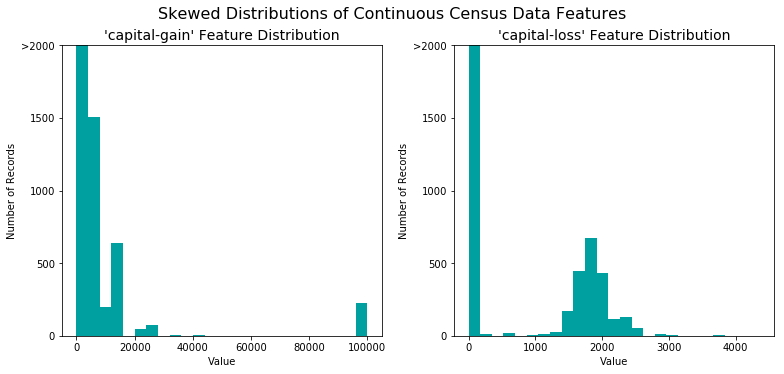

In [4]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

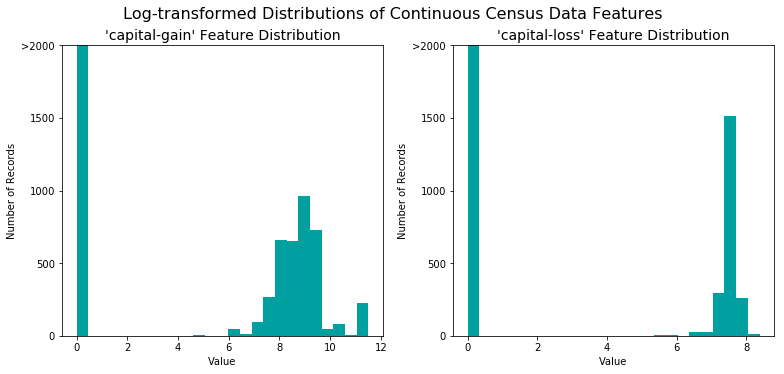

In [5]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

In [6]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [7]:
#One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

    
#Encode the 'income_raw' data to numerical values
income = []
for i in range(income_raw.size): 
     income.append(float(income_raw[i] == '>50K'))


# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

103 total features after one-hot encoding.


In [8]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


C:\Users\J\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
FP = float(income.count(0)) # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

accuracy = (TP + TN)/(TP+FP+TN+FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)


#Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


<b>Question 1 - Naive Predictor Performace</b><br>
If we chose a model that always predicted an individual made more than $50,000, what would that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to 'accuracy' and 'fscore' to be used later.
Please note that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

<b>Answer 1</b>: The F-score for the naive model, assuming all individuals make >$50K is 0.2917.

<b>Question 2 - Model Application</b>
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
Describe one real-world application in industry where the model can be applied.
What are the strengths of the model; when does it perform well?
What are the weaknesses of the model; wen does it perform poorly?
What makes this model a good candidate for the problem, given what you know about the data?


<b>Answer 2</b>: Three possible supervised learning models are <b>decision trees</b>, <b>logistic regression</b>, and <b>K-nearest neighbors</b>.
 
<b>Decision tree</b><br>
(i) A decision tree can be used to model what candidate a person votes for in the US presidential election.  Strictly speaking, the voting prediction should involve a separate yes/no classification model for each candidate. However, since the vast majority of votes go to candidates from the two major parties, the problem can be simplified into a single Republican/Democrat classification model. 

A well known feature of US elections is that geography is a weak feature for classifying individual votes if resolved on the state-wide basis (because of thin margins of victory even in solidly red or blue states) [<a target="_blank" href="http://www-personal.umich.edu/~mejn/election/2016/">1</a>], but becomes much stronger when resolved to the level of counties. Furthermore, the categorization into hundreds of counties is understood to be a proxy for much simpler categorical features: race, population density, and income [<a target="_blank" href="https://www.nytimes.com/interactive/2016/11/08/us/politics/election-exit-polls.html">2</a>]. Rural areas strongly lean Republican and urban ones lean Democrat, while black voters nationwide strongly lean democrat [<a target="_blank" href="https://demographics.virginia.edu/DotMap/">3</a>]. 


(ii) The strength of a decision tree is that it is easy to apply to categorical and non-numeric features, especially with small numbers of categories.  It performs well when there is a hierarchy of importance of the features, so that some or all branches originating from the first few nodes will all result in the same classification [<a target="_blank" href="http://scikit-learn.org/stable/modules/tree.html#tree">4</a>].


For example, in the party affiliation model, it is known that geography and income strongly determine party affiliation, but that geography is more important: most rural voters lean Republican regardless of income, while urban voters of low and moderate income lean democrat and those of high income lean Republican. Thus if geography is the first node in the decision tree, all 'rural' voters can be set to Republican so that subsequent decisions only need to be applied to the 'urban' branch. If income is the second node, all high income earners can be set to Republican and subsequent decisions applied only to the low and moderate income branches of urban voters. In this way, the outcome of the tree (i.e. the resulting categories at the bottom) will have far fewer combinations of feature categories than the total possible number. 

(iii) The weakness of a decision tree is that it can lead to overfitting if there is no hierarchy of importance of features, or if the data set includes unnecessary features that have little predictive power. If branches cannot be neglected near the top of the tree, or if splits are made with weak, unnecessary features, then the number of possible combinations of categories at the bottom will increase geometrically. In addition to increasing computation time, it is possible to achieve a trivially high or perfect classification accuracy by adding unnecessary features to the tree until every single data point has its own branch. Since the testing data are not expected to be related in the same precise way to the unimportant features, the trivially high training score is not reproduced for the testing set and represents an overfit [5].


(iv) In this example, a decision tree model is a good candidate because many of the features are categorical and it makes sense to ask qualitatively whether a certain category is associated with high income or low income rather than to try to map the categories to numbers (other than for labeling purposes). 

Some of the features are clearly more important than others. For example, the workclass feature includes the category of non-paying work, as well as state government work for which there are usually strict limits on salaries. Education is also very important, as those without a college degree usually earn significantly less than those with college or graduate degrees. These two features should be at the top of the decision tree [<a target="_blank" href="https://www.bls.gov/opub/ted/2015/median-weekly-earnings-by-education-gender-race-and-ethnicity-in-2014.htm">6</a>]. Age, while important, should be lower on the decision tree because it is most strongly correlated to income for a given individual throughout their lifetime, rather than for different individuals who may have different education levels and workclasses [<a target="_blank" href="https://www.bls.gov/opub/ted/2017/womens-and-mens-earnings-by-age-in-2016.htm">7</a>].
<br><br>
<b>Logistic regression</b><br>
(i) Logistic regression can be applied to model whether or not a married couple is likely to divorce. Divorce rates are known to depend most strongly on income, education level, age of the spouses, and length of the marriage. Of these variables, only length of marriage has a strong linear correlation to divorce rate [<a target="_blank" href="http://www.pewresearch.org/fact-tank/2017/03/09/led-by-baby-boomers-divorce-rates-climb-for-americas-50-population/">8</a>]. The others are understood by researchers to result from categorical divides: age dependence being due to a generational divide (Baby Boomers, millennials, etc.) and education dependence due to a class divide between those with or without a college education [<a target="_blank" href="http://www.pewresearch.org/fact-tank/2017/09/14/as-u-s-marriage-rate-hovers-at-50-education-gap-in-marital-status-widens/">9</a>]. However, divorce rates are low overall (less than 30%), and while these features account for most of the variation in this rate, the feature categories cannot be neatly grouped into certain to divorce and certain to not divorce classes.

(ii) The strength of logistic regression is that it can accommodate features that have weak classification power where there is an overlap of points with different classes. Logistic regression fits the probability of the outcome classification to a continuous function of the features, as opposed to methods like decision tree or K-nearest neighbors which divide the feature space into regions of entirely one outcome or the other, which are better suited to data where the classes do not overlap. Whereas a decision tree would require many splits to isolate close points that differ in class, logistic regression finds the best split between regions of feature space with relatively higher and lower fractions of income earners [<a target="_blank" href="http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression">10</a>].  


(iii) The weakness of logistic regression is that for categorical variables, especially when transformed with one-shot encoding, there will be many regions of feature space with zero data points. For numerical data, interpolation between neighboring points can be used to determine classes in these regions, but for categorical data this is not possible [11]. 

(iv) Logistic regression is similar to a decision tree but is better suited to features that can be divided into ranges that correlate to income (rather than just high or low) and which may be weak overall so that the entire feature space contains a significant fraction of low income earners. This is likely to be the case for the numerical features in the current problem, because a feature like age correlates to income generally, but might not be strong enough to produce a sharp divide between high and low income classes. To be specific, in 2016 the average of men’s and women’s median weakly earnings for different age groups ranges from a low of approximately \$500 for ages 16-24 to a high of approximately \$900 for ages 55-64 (and then drops slightly for retirees) [<a target="_blank" href="https://www.bls.gov/opub/ted/2017/womens-and-mens-earnings-by-age-in-2016.htm">6</a>]. Multiplying by 52 weeks, the highest median income is still less than \$50,000, meaning that even in the highest income cohort less than 50 percent of individuals are in the ‘high income’ class for this problem. 
<br><br>
<b>K-Nearest Neighbors</b><br>
(i) K-nearest neighbors model can be used to predict race and ethnicity in the US based on geography. Researchers have demonstrated that America is largely segregated based on race [<a target="_blank" href="https://demographics.virginia.edu/DotMap/">3</a>], which in terms of a classification model means that different classes are grouped <i>close</i> together in physical space, which can be measured by features latitude and longitude.

(ii) The benefit of K-nearest neighbors is that the algorithm is simple and, unlike decision trees, classification is based on grouping points close together in all dimensions of the feature space rather than carving out different regions of individual feature axes. It works best when there are at least some regions of feature space that are mostly homogenous with respect to outcome class [<a target="_blank" href="http://scikit-learn.org/stable/modules/neighbors.html#classification">12</a>, 13].

(iii) The weakness of K-nearest neighbors is that the algorithm must compute the distances between all pairs of points, so computation time grows rapidly with the number of features and sample points. Additionally, the classification is based on a "winner take all" vote of the nearest neighbors, so the model performs poorly for data with only weak separation between the different outcome classes [<a target="_blank" href="http://scikit-learn.org/stable/modules/neighbors.html#regression">14</a>,<a target="_blank" href="http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms">15</a>].


(iv) For the current example, there are likely to be certain <i>regions</i> of feature space (i.e. in more than one feature dimension) with a high concentration of high earners, because even if the individual features are weak, the intersection of several features might be strong.


In [10]:
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    #inputs:
    #   - learner: the learning algorithm to be trained and predicted on
    #   - sample_size: the size of samples (number) to be drawn from training set
    #   - X_train: features training set
    #   - y_train: income training set
    #   - X_test: features testing set
    #   - y_test: income testing set

    results = {}

    start = time() # Get start time
    learner.fit(np.array(X_train)[:sample_size], np.array(y_train)[:sample_size])
    end = time() # Get end time
    
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(np.array(X_test)[:sample_size])
    predictions_train = learner.predict(np.array(X_train)[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test[:sample_size],predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test[:sample_size], predictions_test, beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

In [11]:
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

clf_A = KNeighborsClassifier()
clf_B = tree.DecisionTreeClassifier()
clf_C = LogisticRegression()

#Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(0.1*samples_100)
samples_1 = int(0.1*samples_10)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.


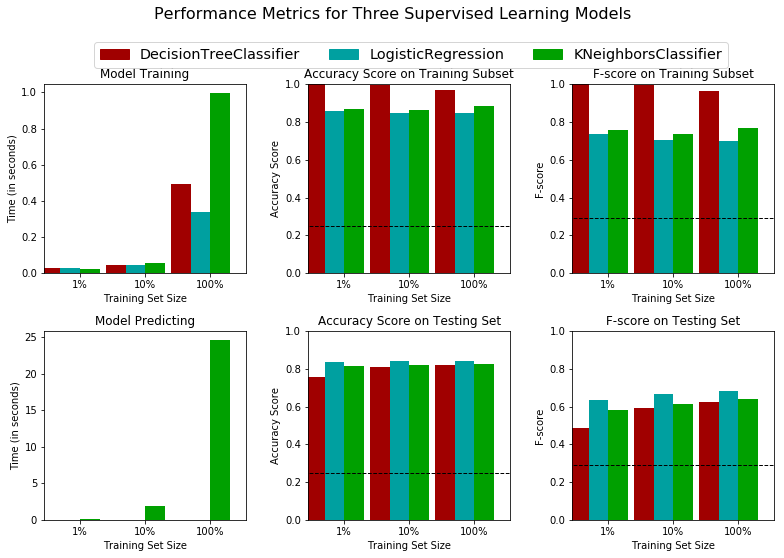

In [12]:
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [13]:
print results['LogisticRegression']

{0: {'pred_time': 0.031000137329101562, 'f_test': 0.63636363636363635, 'train_time': 0.03099989891052246, 'acc_train': 0.85999999999999999, 'acc_test': 0.83379501385041555, 'f_train': 0.73863636363636354}, 1: {'pred_time': 0.016000032424926758, 'f_test': 0.66553384310393648, 'train_time': 0.04699993133544922, 'acc_train': 0.84666666666666668, 'acc_test': 0.84019905999447053, 'f_train': 0.703125}, 2: {'pred_time': 0.032000064849853516, 'f_test': 0.68316522824165538, 'train_time': 0.33699989318847656, 'acc_train': 0.84666666666666668, 'acc_test': 0.841901603095633, 'f_train': 0.69852941176470584}}


<b>Question 3 - Choosing the Best Model</b><br>
Based on the evaluation you performed earlier, in one to two paragraphs, explain to CharityML which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.

<b>Answer 3</b>: The best model for identifying individuals that make more than \$50,000 is logistic regression. This model has the highest F score of 0.683 for 100% of the training data as well as the highest accuracy of 0.842. Furthermore, the training and testing scores rapidly converge to the same values, which means that the model is not overfit or underfit. K-nearest neighbors has the second best score metrics, but a significantly larger computation time. The decision tree has a similar computation time as logistic regression, but has the lowest score metrics. Additionally, the decision tree demonstrates slow convergence of testing and training scores, and a trivially high training score, which are indicative of overfitting.

The superiority of the logistic regression model is due to its suitability for the data compared to the others. The features are not strong enough to cleanly divide income classes, so the high earners will be distributed among lower earners albeit with a higher probability for certain ranges of features. This means that K-nearest will perform poorly and the decision tree will be susceptible to overfitting unless the parameters are optimized.

<b>Question 4 - Describing the model is layman's terms</b><br>
In one to two paragraphs, explain to CharityML, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

<b>Answer 4:</b> The best model for classifying potential donors by high (greater than or equal \$50,000) or low income (less than \$50,000) is logistic regression. This model works by learning how to answer the yes/no question 'Does this individual earn \$50,000 or greater?' based on a large data set (\>40,000 people) that specifies, for each person, various characteristics or 'features' (age, occupation, etc.) and whether they make greater than or equal to \$50,000 or less than \$50,000 (or 'outcomes'.) 

The data includes both discreet or 'categorical' features and continuous or 'numerical' features. To understand the classification model, it is helpful to imagine the data points (i.e. people) plotted on a graph where the axes represent different features (a 'feature space') and the color of the dot represents the outcome. 

It is possible that there is a strict separation of points so that one region of feature space has almost all high income earners and another has almost all low earners. More likely however, there is an overlap of income classes with regions of <i>relatively</i> higher or lower proportions of each class, which is more consistent with numerical features (i.e. those that can change by arbitrarily small amounts). Logistic regression learns how the fraction of high earners changes continously with the changing features, and so is appropriate for this data.

As with many machine learning models, the data set is first split into a 'training set' used to develop the model based on the known outcomes and a smaller 'testing set' used to test it by predicting the outcomes and checking. The logistic regresssion model is trained by dividing the feature space into small regions and calculating the fraction of high earners in the training data that have features in each region. Linear regression is then used to fit this fraction to a continuous function of the features.

Predictions are made by equating the fraction of high income earners with the probability that a given testing point at the same feature values be a high earner. Finally, the high and low income labels are assigned randomly with this probability.

In [14]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


#Initialize the classifier
#clfa = DecisionTreeClassifier()
clf = LogisticRegression()

parameters = {"solver" : ["newton-cg", "lbfgs", "liblinear","sag"], "C": [0.01,0.02,0.05,0.1,0.5]}

scorer = make_scorer(fbeta_score, beta=0.5)
grid_obj = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer)

grid_fit = grid_obj.fit(np.array(X_train), np.array(y_train))

best_clf = grid_fit.best_estimator_


predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

C:\Users\J\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8419
F-score on testing data: 0.6832

Optimized Model
------
Final accuracy score on the testing data: 0.8423
Final F-score on the testing data: 0.6849


<b>Question 5 - Final Model Evaluation</b>
What is your optimized model's accuracy and F-score on the testing data?
Are these scores better or worse than the unoptimized model?
How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in Question 1?


<br>
<b>Answer 5:</b>
<table>
<thead>
<tr>
<th style="text-align:center">Metric</th>
<th style="text-align:center">Unoptimized Model</th>
<th style="text-align:center">Optimized Model</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">Accuracy Score</td>
<td style="text-align:center">0.8419  </td>
<td style="text-align:center">0.8423</td>
</tr>
<tr>
<td style="text-align:center">F-score</td>
<td style="text-align:center">0.6832</td>
<td style="text-align:center">0.6849</td>
</tr>
</tbody>
</table>

<table>
<thead>
<tr>
<th style="text-align:center">Metric</th>
<th style="text-align:center">Naive Model</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">Accuracy Score</td>
<td style="text-align:center">0.2478  </td>
</tr>
<tr>
<td style="text-align:center">F-score</td>
<td style="text-align:center">0.2917</td>
</tr>
</tbody>
</table>
The optimized model is slightly better than the unoptimized model and significantly better than the naive model.

<b>Question 6 - Feature Relevance Observation</b><br>
When Exploring the Data, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why? 

<b>Answer 6:</b> The most important features in decreasing order are most likely: occupation, education level, marital status, capital gain, and age. Occupation is probably most important because it includes categories that strictly separate income classes like executive/managerial (high earning) and cleaning (low earning). 

The remaining features are proxies for having a high or low income job. <b>Education level</b> and <b>marital status</b> are high in importance because there is an established trend in the US that people who are middle or upper class earners are more likely to be married and have a college education than working class earners  [<a target="_blank" href="https://www.nytimes.com/2017/09/25/upshot/how-did-marriage-become-a-mark-of-privilege.html?mcubz=0">15</a>] (in previous decades, there was a far lower class divide by marriage and a college education was not neccesarily a requirement for earning a middle class wage.) <b>Capital gain</b> should roughly correlate with income, but is not as important. Higher income people are more likely to make additional income from capital gains, but an individual's investments can increase or decrease in a particular time period independently of the person's salaried income.

<b>Age</b>, while important overall, is likely to be of relatively lower importance than the other four features. Although age has a direct correlation to income, the correlation is much stronger for individuals throughout their lifetimes (i.e. people tend to make more money as they get older and more experiened) than for the population as a whole which includes individuals with different education levels and occupations [<a target="_blank" href="https://www.bls.gov/opub/ted/2017/womens-and-mens-earnings-by-age-in-2016.htm">7</a>]. 


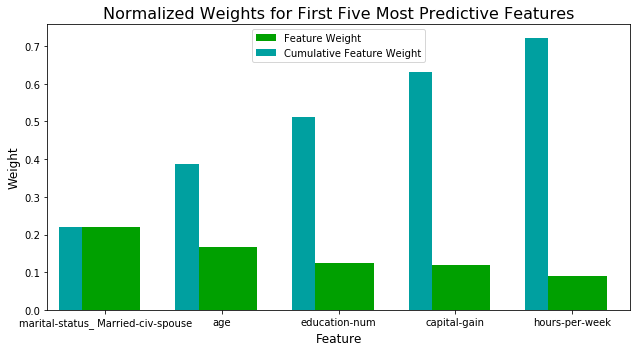

In [15]:
#Train the supervised model on the training set using .fit(X_train, y_train)
model = DecisionTreeClassifier()
modelfit  = model.fit(X_train,y_train)

#Extract the feature importances using .feature_importances_ 
importances = modelfit.feature_importances_

vs.feature_plot(importances, X_train, y_train)

<b>Question 7 - Extracting Feature Importance</b><br>
Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.
How do these five features compare to the five features you discussed in Question 6?
If you were close to the same answer, how does this visualization confirm your thoughts?
If you were not close, why do you think these features are more relevant?

<b>Answer</b>: The only relevant feature which I did not predict is hours per week, and the only feature I predicted that was not among most relevent is occupation.

My assumption that Executive/Managerial jobs mostly have high incomes turned out to be false, the actual correlation between this variable and income being 0.21 (see below). 

Hours per week is the weakest of the top features and the remaining four confirm my intuition: being married, education, capital gains and age are some of the most important features, with marriage and education more important than capital gains. Age turns out to be significantly more important than a thought, ranking between marriage and education.

In [16]:
exec_income_corr = np.corrcoef(income, features_final['occupation_ Exec-managerial'], rowvar = 0)[0,1]
print "Correlation between income class and Executive/Managerial occupation: {:.4f}".format(exec_income_corr)

Correlation between income class and Executive/Managerial occupation: 0.2092


In [17]:
age_income_corr = np.corrcoef(income, features_final['age'], rowvar = 0)[0,1]
print "Correlation between income class and age: {:.4f}".format(age_income_corr)

Correlation between income class and age: 0.2370


In [18]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
start = time()
clf = (clone(clf)).fit(X_train_reduced, y_train)
end = time()
best_time = end - start

# Make new predictions
start = time()
reduced_predictions = clf.predict(X_test_reduced)
end = time()
reduced_time = end - start

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "Computation time: {:.4f}".format(best_time)
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))
print "Computation time: {:.4f}".format(reduced_time)

Final Model trained on full data
------
Accuracy on testing data: 0.8423
F-score on testing data: 0.6849
Computation time: 0.0860

Final Model trained on reduced data
------
Accuracy on testing data: 0.8266
F-score on testing data: 0.6481
Computation time: 0.0010


<b>Question 8</b> - Effects of Feature Selection
How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used? If training time was a factor, would you consider using the reduced data as your training set?

<b>Answer 8</b>: In the reduced data model, accuracy drops to 83% from 84%, and F score drops to 65% from 69%. This is only a slight reduction in score while the computation time (see previous cell) drops to essentially zero (to four decimal places) from 0.1270. The reduced data model should be considered for large datasets if a shorter computation time is desired.

<b>References</b>
1. http://www-personal.umich.edu/~mejn/election/2016/
2. https://www.nytimes.com/interactive/2016/11/08/us/politics/election-exit-polls.html
3. https://demographics.virginia.edu/DotMap/
4. http://scikit-learn.org/stable/modules/tree.html#tree
5. "Principles of Data Mining". 2007.
6. https://www.bls.gov/opub/ted/2015/median-weekly-earnings-by-education-gender-race-and-ethnicity-in-2014.htm
7. https://www.bls.gov/opub/ted/2017/womens-and-mens-earnings-by-age-in-2016.htm
8. http://www.pewresearch.org/fact-tank/2017/03/09/led-by-baby-boomers-divorce-rates-climb-for-americas-50-population/
9. http://www.pewresearch.org/fact-tank/2017/09/14/as-u-s-marriage-rate-hovers-at-50-education-gap-in-marital-status-widens/
10. http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
11. Menard, Scott W. (2002). Applied Logistic Regression (2nd ed.). SAGE
12. http://scikit-learn.org/stable/modules/neighbors.html#classification
13. Altman, N. S. (1992). "An introduction to kernel and nearest-neighbor nonparametric regression". The American Statistician. 46 (3): 175–185.
14. http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms
15. http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms
16. https://www.nytimes.com/2017/09/25/upshot/how-did-marriage-become-a-mark-of-privilege.html?mcubz=0
